In [88]:
import numpy as np
import pandas as pd
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [89]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [90]:
features = train_data.drop('diagnosed_diabetes', axis=1)
labels = train_data['diagnosed_diabetes'].astype(int)

features.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,108,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,123,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,124,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0


In [91]:
labels.head()

0    1
1    1
2    0
3    1
4    1
Name: diagnosed_diabetes, dtype: int64

In [92]:
# 把gender一列换成0和1
features['gender'] = features['gender'].map(lambda x: 1 if x == 'Male' else 0)
features.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,102,0,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,124,0,White,Highschool,Upper-Middle,Never,Employed,0,0,0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,108,1,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,123,0,White,Highschool,Lower-Middle,Current,Employed,0,1,0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,124,1,White,Highschool,Upper-Middle,Never,Retired,0,1,0


In [93]:
def transform_data(features: pd.DataFrame) -> pd.DataFrame:
    def ethnicity_to_num(x):
        mapping = {
            'White': 0,
            'Black': 1,
            'Hispanic': 2,
            'Asian': 3,
            'Other': 4
        }
        return mapping.get(x, -1)  # 返回-1表示未知类别
    features['ethnicity'] = features['ethnicity'].map(ethnicity_to_num)

    def educationmap(x):
        mapping = {
            'Highschool': 0,
            'Graduate': 1,
            'Postgraduate': 2
        }
        return mapping.get(x, -1)  # 返回-1表示未知类别
    features['education_level'] = features['education_level'].map(educationmap)

    def income_to_num(x):
        mapping = {
            'Lower-Middle': 0,
            'Middle': 1,
            'Upper-Middle': 2
        }
        return mapping.get(x, -1)  # 返回-1表示未知类别
    features['income_level'] = features['income_level'].map(income_to_num)

    def smoking_status_to_num(x):
        mapping = {
            'Never': 0,
            'Former': 1,
            'Current': 2
        }
        return mapping.get(x, -1)  # 返回-1表示未知类别
    features['smoking_status'] = features['smoking_status'].map(smoking_status_to_num)

    def employment_status_to_num(x):
        mapping = {
            'Employed': 0,
            'Unemployed': 1,
            'Student': 2,
            'Retired': 3
        }
        return mapping.get(x, -1)  # 返回-1表示未知类别
    features['employment_status'] = features['employment_status'].map(employment_status_to_num)
    return features

features = transform_data(features)
features.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,102,0,2,0,0,2,0,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,124,0,0,0,2,0,0,0,0,0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,108,1,2,0,0,0,3,0,0,0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,123,0,0,0,0,2,0,0,1,0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,124,1,0,0,2,0,3,0,1,0


In [94]:
DROP_COLUMNS = ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
features = features.drop(columns=DROP_COLUMNS, axis=1)
features.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,0,0,0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,0,0,0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,0,0,0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,0,1,0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,0,1,0


In [95]:
feature_train, feature_test, label_train, label_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

In [96]:
(label_test == 1).sum().item() / len(label_test)

0.6240785714285715

In [97]:
(label_train == 1).sum().item() / len(label_train)

0.6231

In [98]:
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)
xgb.fit(feature_train, label_train)
label_pred = xgb.predict(feature_test)

accuracy = accuracy_score(label_test, label_pred)
precision = precision_score(label_test, label_pred)
recall = recall_score(label_test, label_pred)
f1 = f1_score(label_test, label_pred)
roc_auc = roc_auc_score(label_test, xgb.predict_proba(feature_test)[:, 1])

print("=== XGBoost Classifier Performance ===")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

=== XGBoost Classifier Performance ===
Accuracy: 0.6834
Precision: 0.7054
Recall: 0.8459
F1 Score: 0.7693
ROC AUC Score: 0.7238


In [99]:
gbm = LGBMClassifier(n_estimators=200, learning_rate=0.25, max_depth=10, random_state=42)
gbm.fit(feature_train, label_train)
label_pred = gbm.predict(feature_test)

accuracy = accuracy_score(label_test, label_pred)
precision = precision_score(label_test, label_pred)
recall = recall_score(label_test, label_pred)
f1 = f1_score(label_test, label_pred)
roc_auc = roc_auc_score(label_test, xgb.predict_proba(feature_test)[:, 1])

print("=== LightGBM Classifier Performance ===")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

[LightGBM] [Info] Number of positive: 348936, number of negative: 211064
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1876
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623100 -> initscore=0.502727
[LightGBM] [Info] Start training from score 0.502727
=== LightGBM Classifier Performance ===
Accuracy: 0.6834
Precision: 0.7072
Recall: 0.8410
F1 Score: 0.7683
ROC AUC Score: 0.7238


In [102]:
cat = CatBoostClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42, verbose=0)
cat.fit(feature_train, label_train)
label_pred = cat.predict(feature_test)

accuracy = accuracy_score(label_test, label_pred)
precision = precision_score(label_test, label_pred)
recall = recall_score(label_test, label_pred)
f1 = f1_score(label_test, label_pred)
roc_auc = roc_auc_score(label_test, cat.predict_proba(feature_test)[:, 1])

print("=== CatBoost Classifier Performance ===")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

=== CatBoost Classifier Performance ===
Accuracy: 0.6803
Precision: 0.7006
Recall: 0.8518
F1 Score: 0.7688
ROC AUC Score: 0.7218


Top 20 features by importance:
family_history_diabetes               0.830525
physical_activity_minutes_per_week    0.038623
age                                   0.036411
triglycerides                         0.012063
bmi                                   0.009821
ldl_cholesterol                       0.007793
cardiovascular_history                0.006626
diet_score                            0.005876
hdl_cholesterol                       0.005838
heart_rate                            0.005814
waist_to_hip_ratio                    0.005565
cholesterol_total                     0.005474
systolic_bp                           0.005011
id                                    0.004486
screen_time_hours_per_day             0.004315
hypertension_history                  0.004295
diastolic_bp                          0.003987
alcohol_consumption_per_week          0.003758
sleep_hours_per_day                   0.003717
dtype: float32


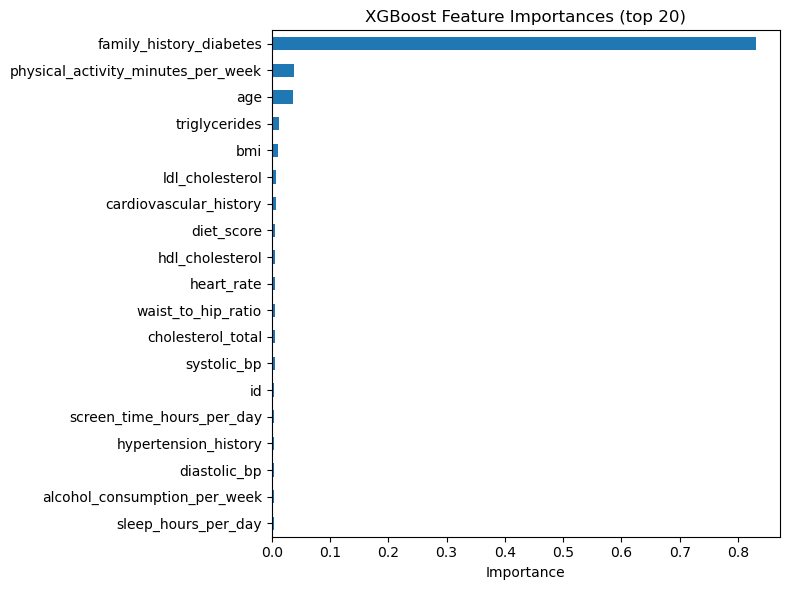

In [103]:
# XGBoost 特征重要性（取 top 20 并绘图）
importances = pd.Series(xgb.feature_importances_, index=feature_train.columns)
importances_sorted = importances.sort_values(ascending=False)

print("Top 20 features by importance:")
print(importances_sorted.head(20))

plt.figure(figsize=(8,6))
importances_sorted.head(20).sort_values().plot(kind='barh')
plt.title("XGBoost Feature Importances (top 20)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [104]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [ ]:
test_pred = xgb.predict(test_data.drop(columns=DROP_COLUMNS, axis=1))
test_pred[:5]

array([1, 1, 1, 0, 1])

In [ ]:
test_df = pd.DataFrame(test_pred, columns=['diagnosed_diabetes'], index=test_data['id'])
test_df

,diagnosed_diabetes
id,
700000,1
700001,1
700002,1
700003,0
700004,1
...,...
999995,1
999996,1
999997,1


In [114]:
test_df.to_csv('data/test_predictions.csv', index_label='id')